# Primer corte del proyecto final de Estadística

### Tema de la BD: 
Precio de las Laptop. Los datos fueron obtenidos a traves del siguiente enlace: (https://www.kaggle.com/datasets/abdocan/laptop-prices)

### Integrantes:
- Carlos Daniel Largacha Leal  C312
- Gabriel Andrés Pla Lasa  C311

## Importación de las librerías necesarias

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats


## 1. Carga de datos

In [2]:
laptop_data = pd.read_csv('laptop_prices.csv')

## 2. Análisis descriptivo de los datos

#### 2.1 Infomacion general del dataset

In [3]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

#### 2.2 Primeras filas del dataset

In [4]:
print(laptop_data.head())

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

#### 2.3 Análisis de los datos numéricos

In [5]:
# Calcular la moda para cada columna y añadirla al resumen
mode_summary = laptop_data.mode().iloc[0]  # La moda puede tener múltiples valores; tomamos el primero
extended_summary = laptop_data.describe().transpose()

# Añadir una columna para la moda
extended_summary['mode'] = mode_summary

# Mostrar el resumen extendido
extended_summary


,count,mean,std,min,25%,50%,75%,max,mode
Inches,1275.0,15.022902,1.429470,10.10,14.0,15.60,15.60,18.4,15.6
Ram,1275.0,8.440784,5.097809,2.00,4.0,8.00,8.00,64.0,8.0
Weight,1275.0,2.040525,0.669196,0.69,1.5,2.04,2.31,4.7,2.2
Price_euros,1275.0,1134.969059,700.752504,174.00,609.0,989.00,1496.50,6099.0,1099.0
ScreenW,1275.0,1900.043922,493.346186,1366.00,1920.0,1920.00,1920.00,3840.0,1920.0
ScreenH,1275.0,1073.904314,283.883940,768.00,1080.0,1080.00,1080.00,2160.0,1080.0
CPU_freq,1275.0,2.302980,0.503846,0.90,2.0,2.50,2.70,3.6,2.5
PrimaryStorage,1275.0,444.517647,365.537726,8.00,256.0,256.00,512.00,2048.0,256.0
SecondaryStorage,1275.0,176.069020,415.960655,0.00,0.0,0.00,0.00,2048.0,0.0


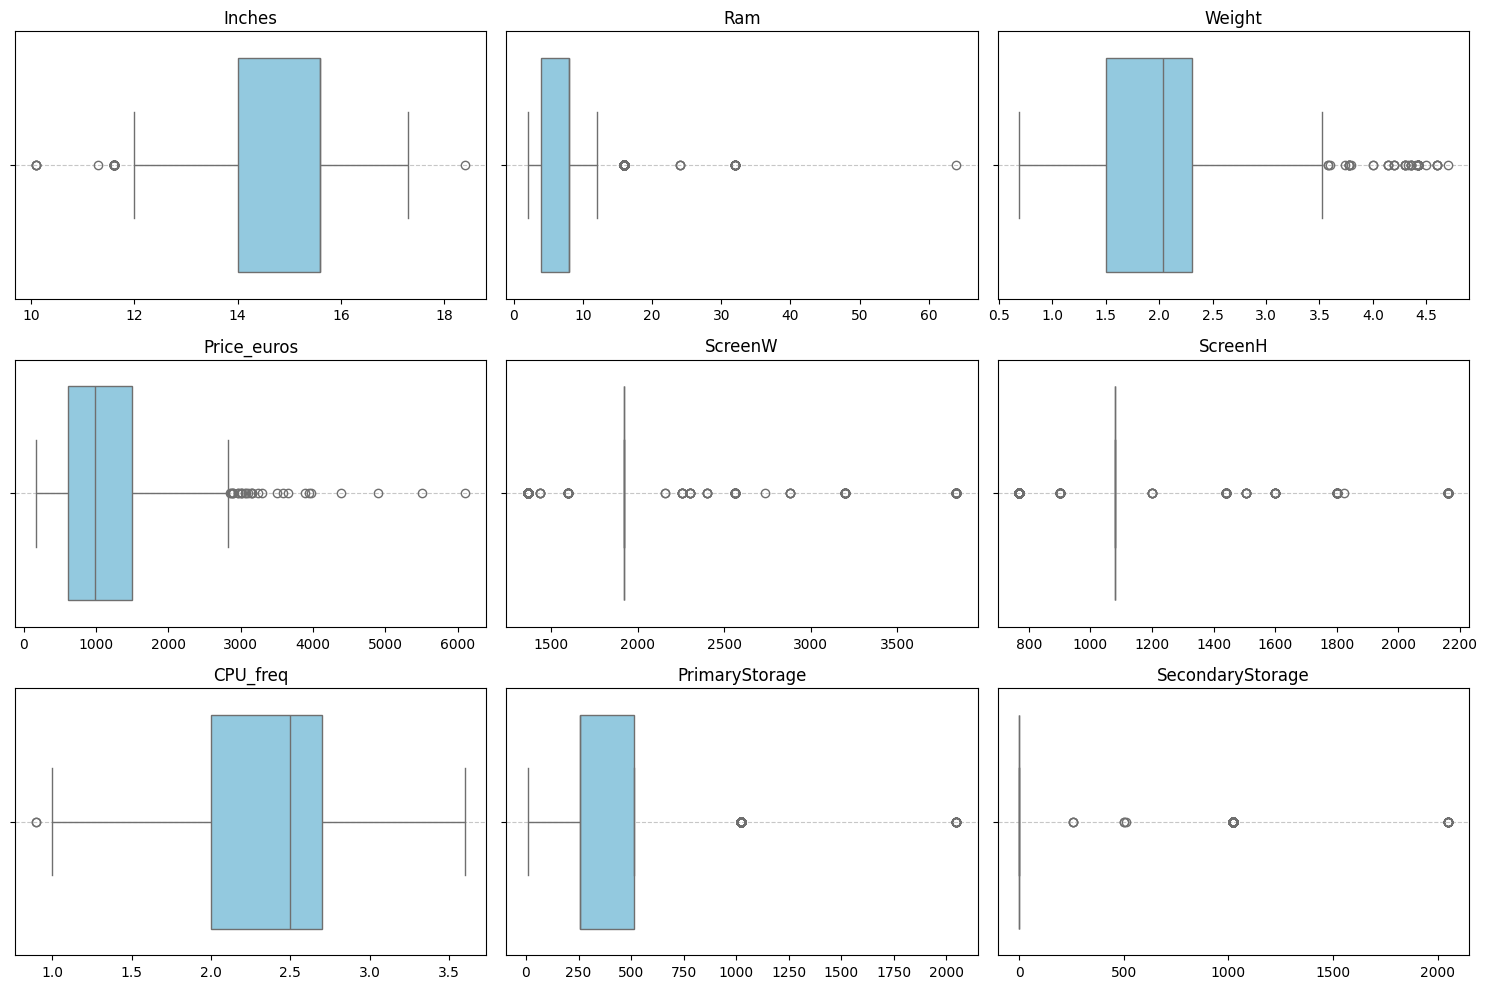

In [6]:
# Crear boxplots para cada columna numérica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=laptop_data, x=col, color='skyblue')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


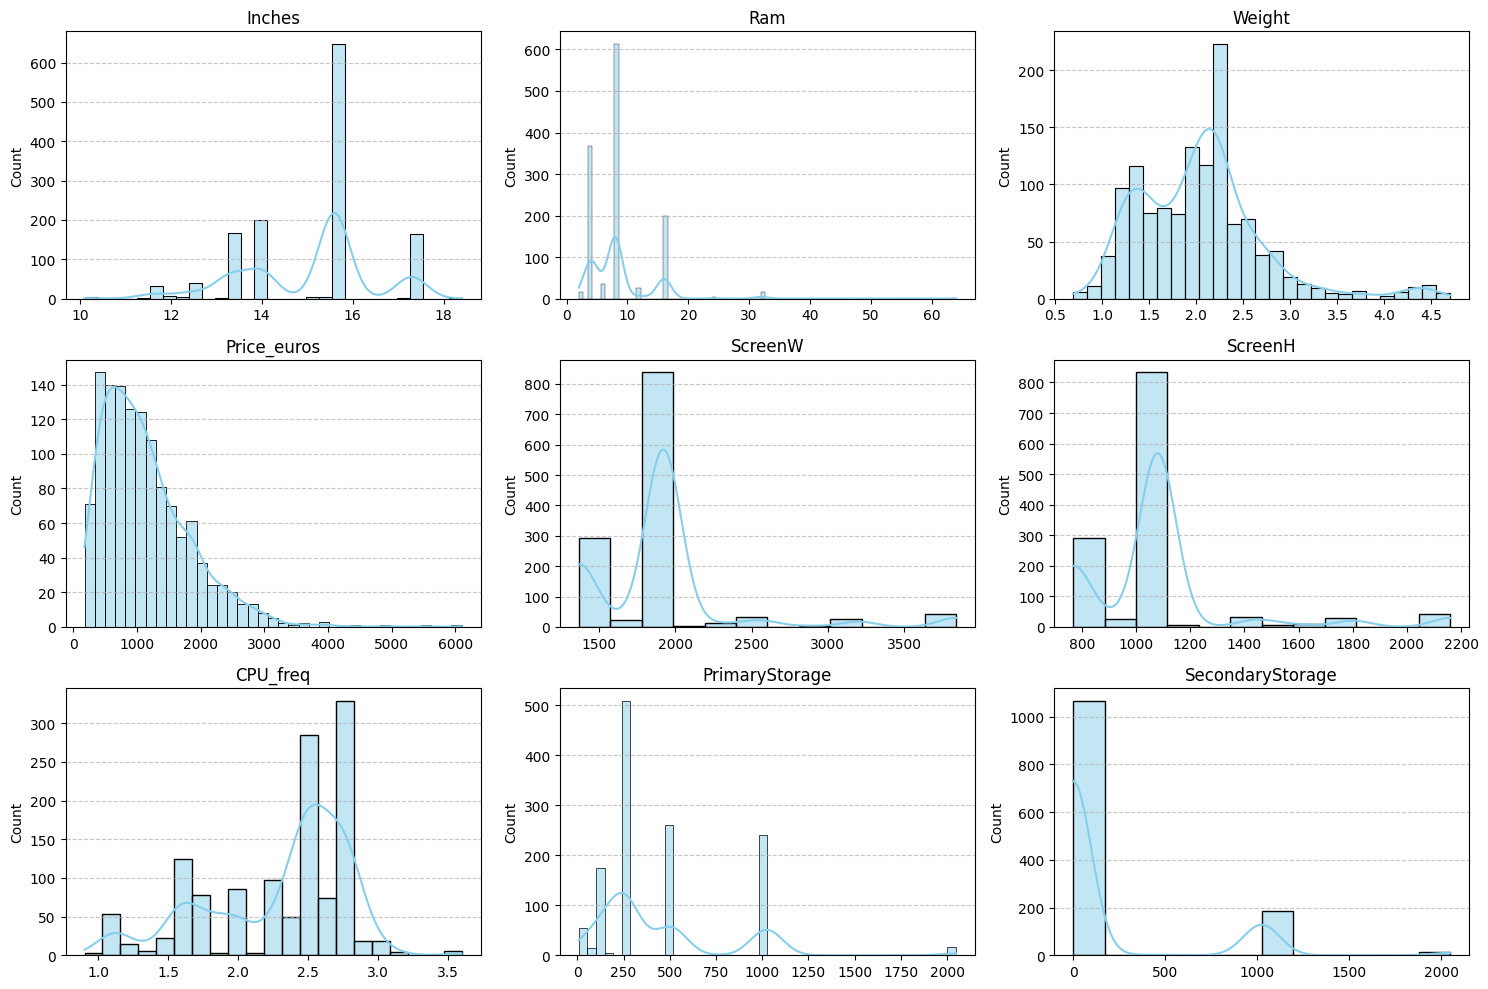

In [7]:
# Crear boxplots para cada columna numérica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=laptop_data, x=col, color='skyblue', kde=True)
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
def plot_histogram_and_boxplot(data, columns):
    """
    Genera un histograma y un boxplot para cada columna dada.

    Args:
    data (DataFrame): Dataset que contiene las columnas.
    columns (list): Lista de nombres de columnas a graficar.
    """
    for column in columns:
        if column not in data.columns:
            print(f"La columna '{column}' no existe en el dataset.")
            continue
        
        # Crear una figura con dos subplots
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f'Análisis de {column}', fontsize=16)
        
        # Histograma
        sns.histplot(data[column], bins=30, kde=True, ax=axes[0], color="skyblue")
        axes[0].set_title(f'Histograma de {column}')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frecuencia')
        
        # Boxplot
        sns.boxplot(data[column], ax=axes[1], color="orange")
        axes[1].set_title(f'Boxplot de {column}')
        axes[1].set_xlabel(column)
        
        # Mostrar los gráficos
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta para no sobreponer el título
        plt.show()


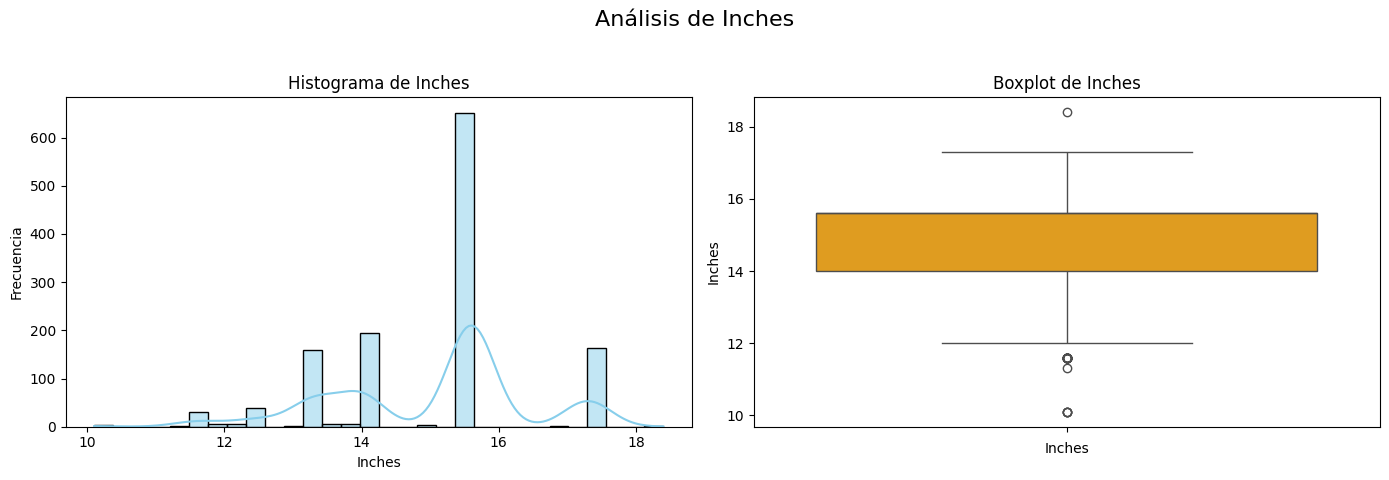

In [9]:
plot_histogram_and_boxplot(laptop_data, ['Inches'])

#### `Inches` (Tamaño de pantalla)
- **Rango típico:** La mayoría de las laptops tienen pantallas entre 13 y 15 pulgadas.
- **Valores atípicos:** Existen laptops más pequeñas (11 pulgadas) y otras significativamente grandes (17 pulgadas o más), posiblemente dirigidas a gamers o diseñadores gráficos.
- **Conclusión:** Este rango refleja una preferencia por tamaños estándar, con pocos modelos especializados para usuarios extremos.

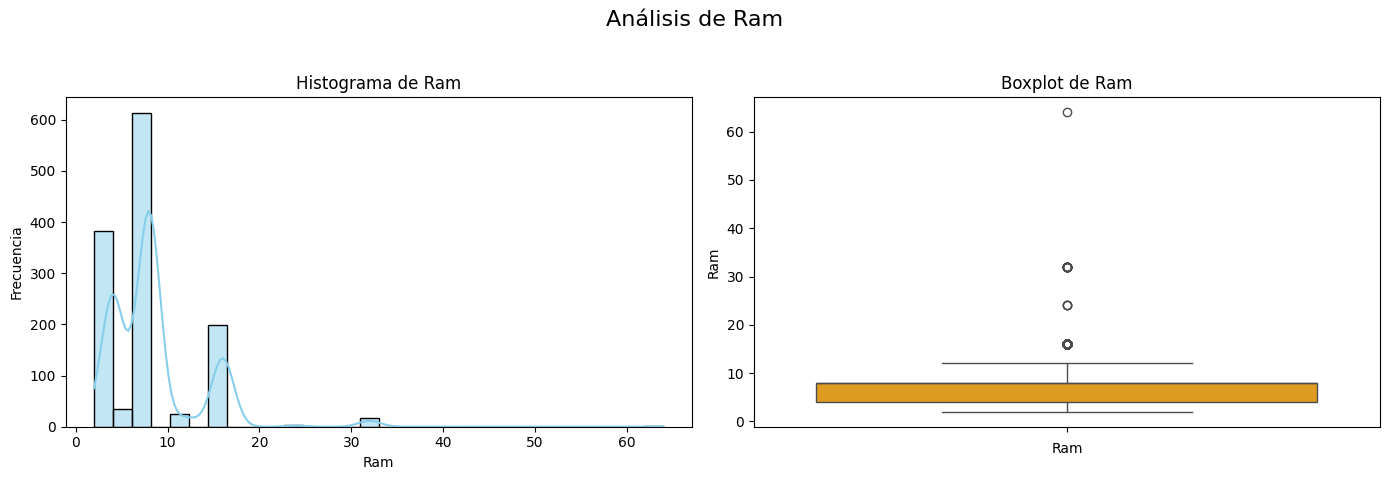

In [25]:
plot_histogram_and_boxplot(laptop_data, ['Ram'])

#### `RAM`
- **Rango típico:** Entre 8 GB y 16 GB de RAM. Esto es consistente con configuraciones estándar en laptops modernas.
- **Valores atípicos:** Algunas laptops tienen hasta 64 GB de RAM, lo que las clasifica como estaciones de trabajo o equipos para tareas muy intensivas (gaming, edición de video, etc.).
- **Distribución:** Aunque no hay un sesgo claro, los valores extremos indican un aumento en el uso de RAM en laptops de alto rendimiento.
- **Conclusión:** La RAM tiende a estar optimizada para usuarios promedio, con modelos premium destacando por su capacidad excepcional.

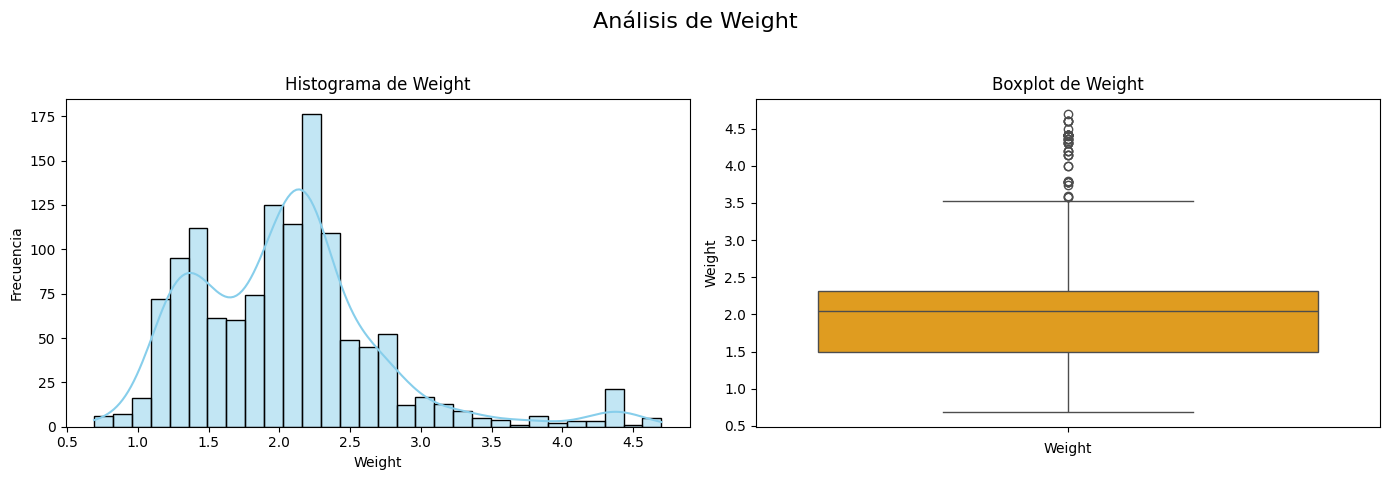

In [26]:
plot_histogram_and_boxplot(laptop_data, ['Weight'])

#### `Weight` (Peso)
- **Rango típico:** La mayoría de las laptops pesan entre 1 y 2 kg, reflejando un mercado centrado en la portabilidad.
- **Valores atípicos:** Laptops por debajo de 1 kg (ultraligeras) o superiores a 2.5 kg, probablemente destinadas a juegos o trabajo intensivo.
- **Distribución:** Hay una leve asimetría hacia la derecha, debido a modelos más pesados.
- **Conclusión:** El peso refleja una clara tendencia hacia la portabilidad, con excepciones en segmentos de productividad y gaming.

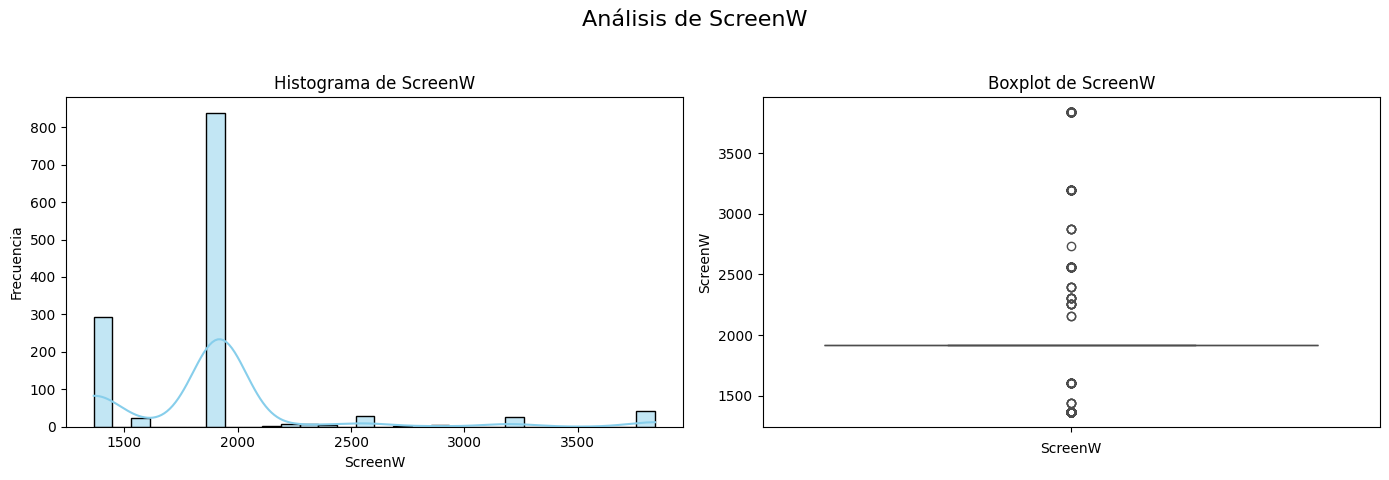

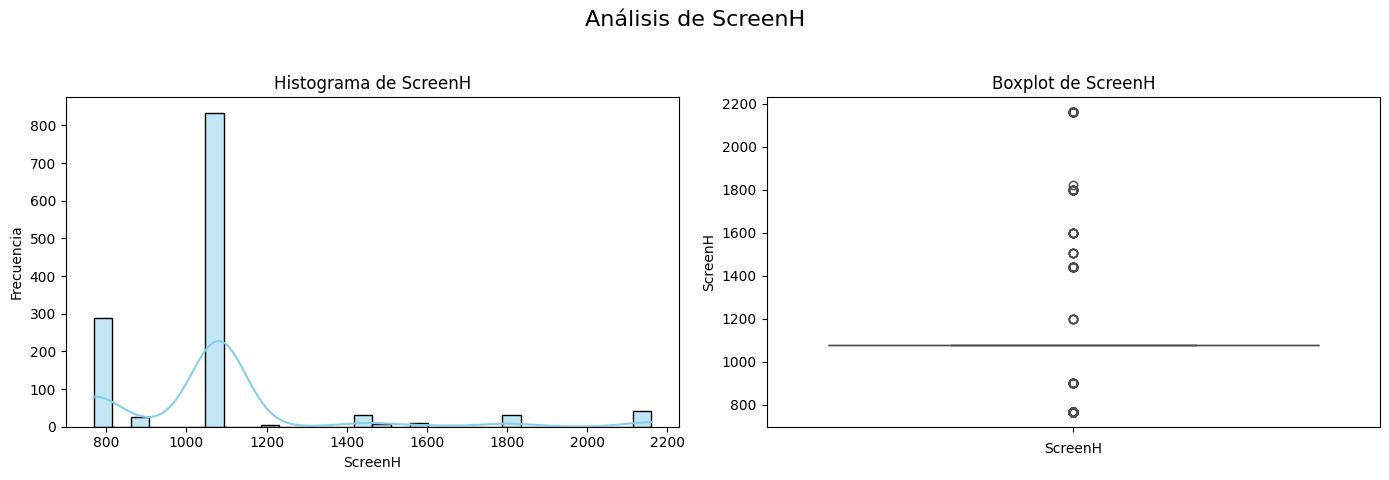

In [27]:
plot_histogram_and_boxplot(laptop_data, ['ScreenW', 'ScreenH'])

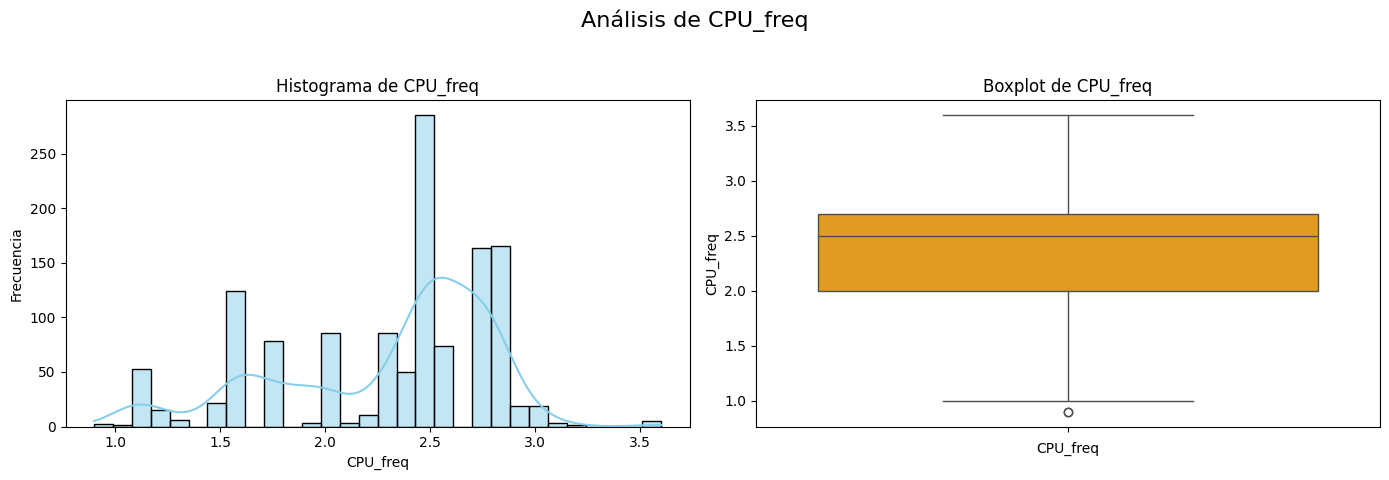

In [28]:
plot_histogram_and_boxplot(laptop_data, ['CPU_freq'])

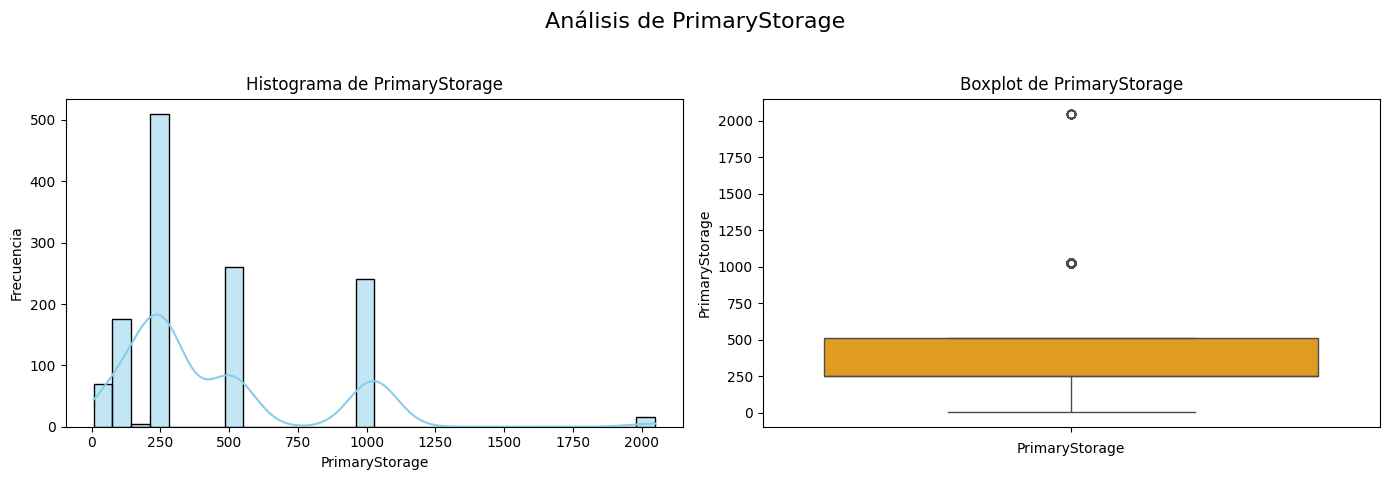

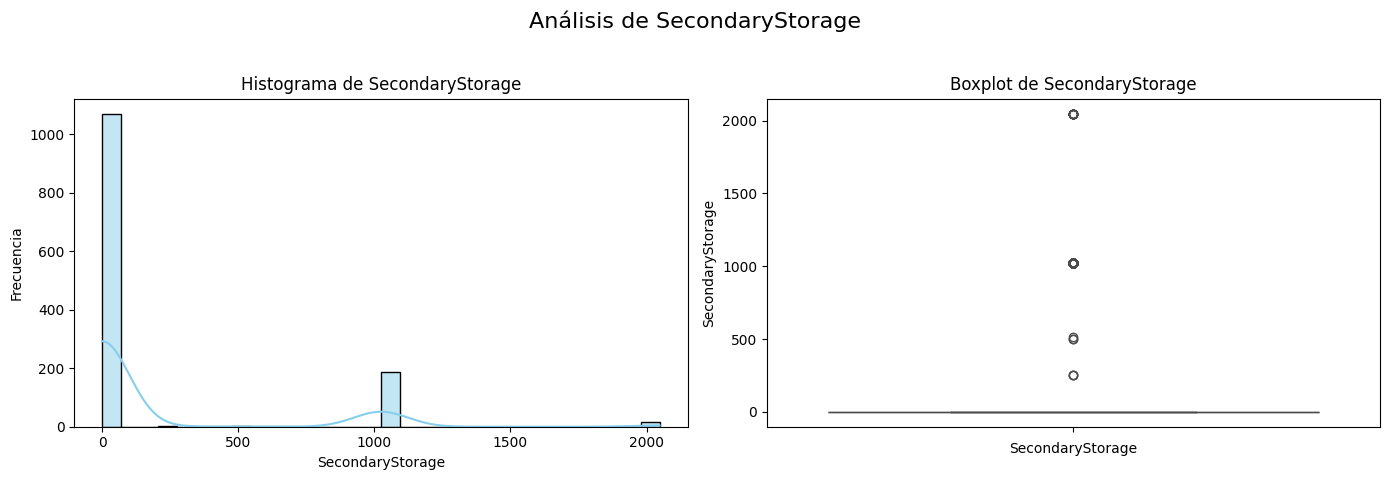

In [31]:
plot_histogram_and_boxplot(laptop_data, ['PrimaryStorage', 'SecondaryStorage'])

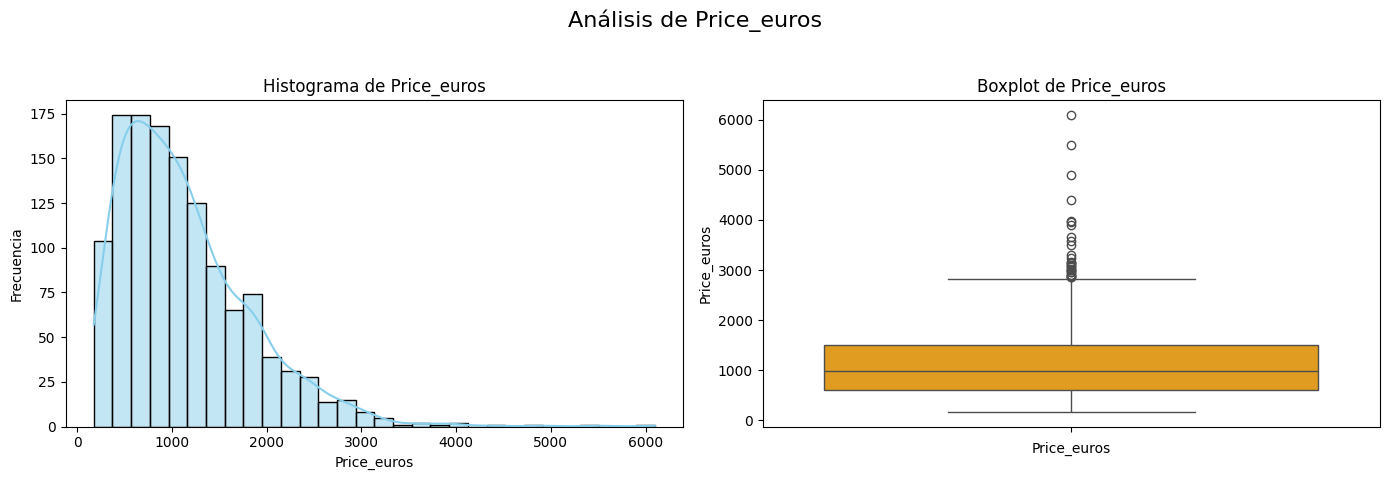

In [24]:
plot_histogram_and_boxplot(laptop_data, ['Price_euros'])

#### Histograma de Price_euros

- **Distribución asimétrica (sesgo positivo):**
  - El histograma muestra que la mayoría de los precios están concentrados en el rango entre 500 y 1500 euros.
  - La cola derecha indica la presencia de algunos laptops con precios significativamente más altos (modelos premium).

- **Densidad baja en precios altos:**
  - Hay una caída drástica en la frecuencia conforme los precios aumentan más allá de los 2000 euros, sugiriendo que estos modelos no son comunes en el mercado.

- **Pico en el rango intercuartílico (IQR):**
  - Los valores más densos parecen estar entre 800 y 1200 euros, que es el rango típico para laptops de gama media.

#### Boxplot  de Price_euros

- **Presencia de valores atípicos (outliers):**
  - Hay múltiples puntos fuera del límite superior del bigote, indicando modelos con precios excepcionalmente altos.
  - Estos valores atípicos representan laptops de alta gama, estaciones de trabajo o equipos diseñados para propósitos específicos como gaming extremo o edición profesional.

- **Rango intercuartílico (IQR):**
  - El rango típico de precios (IQR) está entre 500 y 1500 euros, lo que incluye la mayoría de las laptops estándar.

- **Mediana de precios:**
  - La línea dentro del box indica que la mediana de precios está por debajo del centro del IQR, lo que confirma un sesgo positivo.

- **Simetría del rango inferior:**
  - El bigote inferior está más cerca del rango intercuartílico, lo que refleja que hay pocos modelos con precios extremadamente bajos.


#### Distribución de `prices_euros`

Según el histograma de la columna `prices_euros`, parece que esta variable no sigue una distribución normal debido a su asimetría positiva (sesgo hacia la derecha). Sin embargo, con base en su forma, podría seguir una distribución Log-Normal.

**Características de la distribución Log-Normal:**
- Es común en datos de precios, ya que estos no pueden tomar valores negativos.
- La mayoría de los valores están concentrados en el rango más bajo, pero hay una cola larga hacia la derecha.

**Justificación:**
El histograma muestra una acumulación en los precios bajos (500-1500 euros) y una cola hacia precios más altos, lo cual es típico de esta distribución.


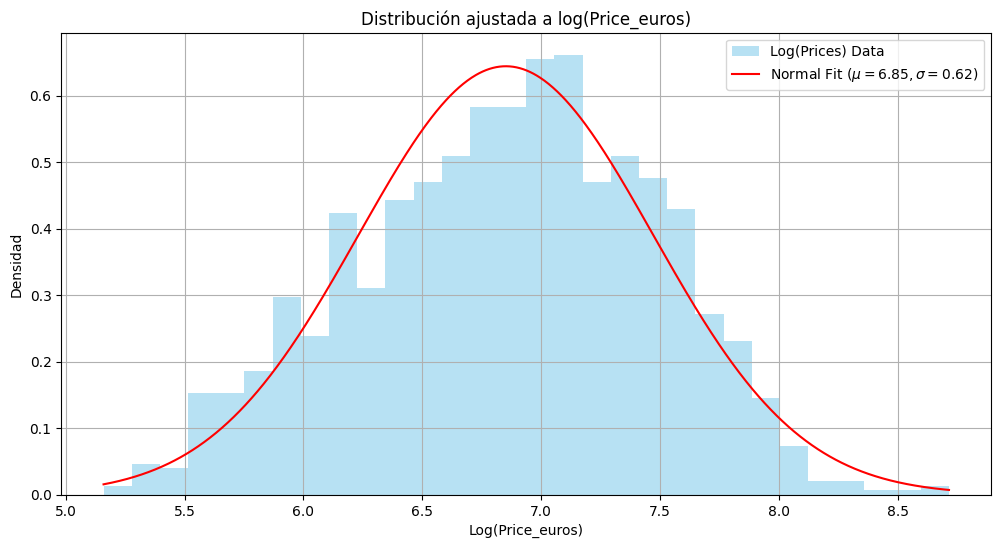

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar valores de Price_euros
price_data = laptop_data['Price_euros'].dropna()

# Aplicar logaritmo natural para modelar como distribución log-normal
log_prices = np.log(price_data)

# Ajustar una distribución normal a los datos transformados
#mu, sigma = stats.norm.fit(log_prices)
mu = np.mean(log_prices)  # Estimador de la Media
sigma = np.sqrt(np.mean((log_prices - mu)**2))  # Estimador de la desviación estándar

# Graficar el ajuste
plt.figure(figsize=(12, 6))

# Histograma de los datos transformados
plt.hist(log_prices, bins=30, density=True, alpha=0.6, color='skyblue', label='Log(Prices) Data')

# Distribución ajustada
x = np.linspace(log_prices.min(), log_prices.max(), 1000)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', label=f'Normal Fit ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')

plt.title("Distribución ajustada a log(Price_euros)")
plt.xlabel("Log(Price_euros)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


##### Conclusiones de la distribución Log-Normal de `Price_euros`

Con base en el ajuste realizado, los datos transformados mediante el logaritmo natural (`log(Price_euros)`) parecen seguir una distribución normal razonablemente bien. Esto implica que los precios originales (`Price_euros`) se ajustan a una distribución log-normal.

Una distribución log-normal significa que los precios bajos son más frecuentes, mientras que los precios altos ocurren con menor frecuencia pero tienen un impacto significativo.

Este comportamiento es común en mercados donde los valores extremos (como laptops premium) tienen gran importancia en comparación con productos regulares.


In [ ]:
# Resumen para variables categóricas: número de valores únicos
categorical_summary = laptop_data.select_dtypes(include='object').nunique().to_frame(name='Unique Values')
categorical_summary

,Unique Values
Company,19
Product,618
TypeName,6
OS,9
Screen,4
Touchscreen,2
IPSpanel,2
RetinaDisplay,2
CPU_company,3
CPU_model,93


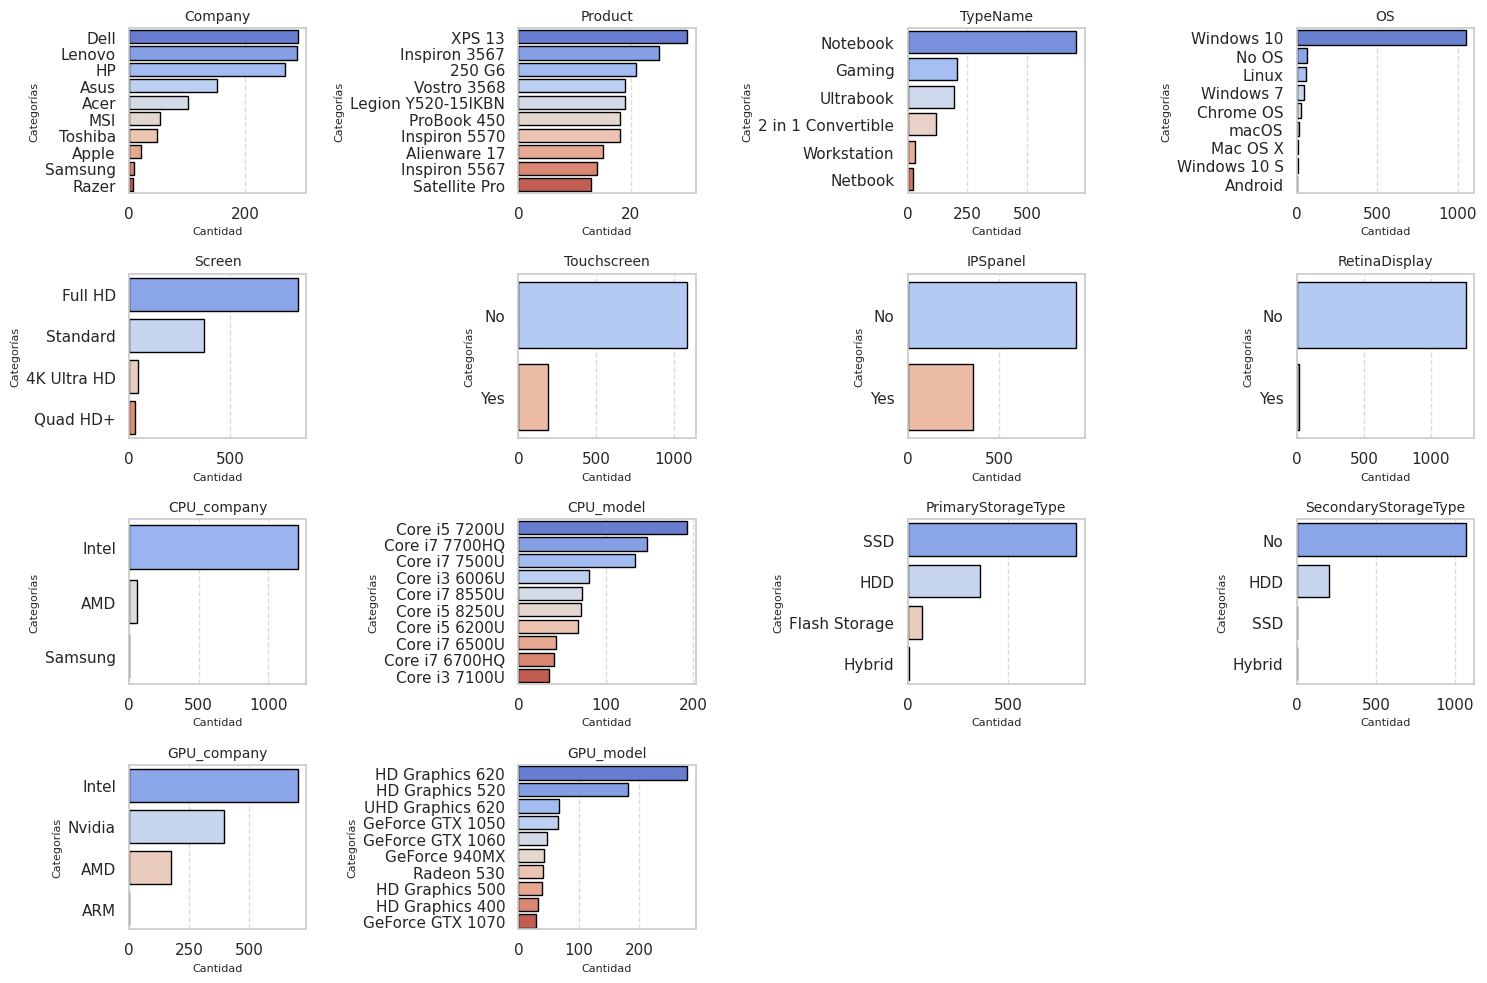

In [33]:
# Graficar los valores únicos de las columnas categóricas
categorical_columns = laptop_data.select_dtypes(include='object').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    unique_counts = laptop_data[col].value_counts().head(10)  # Top 10 categorías
    sns.barplot(
        y=unique_counts.index, 
        x=unique_counts.values, 
        palette='coolwarm', 
        edgecolor='black', 
        hue=unique_counts.index, 
        dodge=False 
    )
    plt.title(col, fontsize=10)
    plt.xlabel('Cantidad', fontsize=8)
    plt.ylabel('Categorías', fontsize=8)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
